# Assessing Risk using Inferential Statistics

As Risk measurement within the CAPM, the Beta-Factor reflects the sensitive of a particular security against its market volatility.

Since, we want to measure the development of the general risk and uncertainty level of Germany, bootsrapping allows to use resampled data to make statistical inferences. The other one is permutation which is a statistical method to derive whether or not the null hypothesis can be rejected based on the p-value.

**Statistics fundamentals:**

Before we get into the single steps of the statistical analysis of Beta-factors over time, I want to ensure some basic understanding of the applied methods and test statistics in question:

- The **null hypothesis** states that there is no relationship between the two variables being studied (one variable does not affect the other). It states the results are due to chance and are not significant in terms of supporting the idea being investigated.

- The **alternative hypothesis** states that the independent variable did affect the dependent variable, and the results are significant in terms of supporting the theory being investigated (i.e. not due to chance)

- A **p-value**, or probability value, is a number describing how likely it is that your data would have occurred by random chance (i.e. that the null hypothesis is true). The level of **statistical significance** is often expressed as a p-value between 0 and 1. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.

- **Hypothesis testing:**
testing a hypothesis is an assessment of how reasonable the observed data are assuming the hypothesis is true.

- **Test statistic:**
A test statistic is a single number that can be computed from observed data and also from data you simulate under the null hypothesis. It serves as a basis of comparison between what the hypothesis predicts and what we actually observed. Importantly, you should choose your test statistic to be something that is pertinent to the question you are trying to answer with your hypothesis test, in this case, are the two states different?

- **Standard Deviation**
Standard deviation is a descriptive statistic, which means it helps you to describe or summarize your dataset. It measures how much “spread” or variability there is within your dataset by how far each value within your dataset lies from the mean.

- **Standard Error (Variance)**
Standard error (or standard error of the mean) is an inferential statistic that tells you, in simple terms, how accurately your sample data represents the whole population. Different samples of the same population will give you different results, so it’s important to understand how applicable your findings are. So, when you take the mean results from your sample data and compare it with the overall population mean on a distribution, the standard error tells you what the variance is between the two means. In the case of high standard error, your sample data does not accurately represent the population data; the sample means are widely spread around the population mean.

## a) Permutation on Distributions

**Permutation-Tests explained:**

**Permutation-based analyses** resemble the bootstrap in that they rely on randomizations of the observed data. The primary difference is that while bootstrap analyses typically seek to quantify the sampling distribution of some statistic computed from the data, permutation analyses typically seek to quantify the null distribution. That is, they seek to break whatever structure might be preset in a dataset, and quantify the kinds of patterns one expects to see “purely by chance.”

**Details:**

 We will consider permutation tests in the context of regression or classification tasks in which the data come in pairs {(xi, yi)}, for i = 1, . . . , n. The idea of a permutation analysis is to randomly permute (or “shuffle”) the xi’s with respect to the yi’s so that any statistical relationship between them is lost. If we estimate regression weights or class labels from many repeated randomly permuted datasets, we can use the resulting samples to characterize the null distribution of the weights, that is, the distribution we would expect if there were no statistical relationship between x and y.
Note however that there are a wide variety of different kinds of permutation analyses, depend- ing on the null hypothesis of interest. The common thread is that one seeks to permute the data in a way that removes some aspects of the statistical structure while possibly preserving others (e.g., the relationship between the individual entries in the x vectors).

**Permutation on two identically distributed groups**
Permutation testing treats two samples of different population as one sample of the same population. Thus, the researcher can determine weather or not the two samples are equally distributed. The widely test statistic is the difference of means.
In python, we can take values for first sample and others and shuffle them, treating the two groups as one big group.

This data treatment makes sense, in order to determine how different Beta-factors or WACCs are depending on the sector of the respective company. So this approach is the Permutation test (a)




In this first part of the Permutation Testing approach, we apply Permutation ("Shuffling") of data sets in order to verify the null hypothesis that states: Beta-distribution of sector A and Beta-distribution of sector B are equally distributed.

**Pipeline of this Permutation test:**
1. Retrieve data and cluster data (get beta-factors, groupby sector, create np.array() (`df["column"].values`)
2. Compute Permutation Samples (define function)
3. Visualizing Permutation Samples
4. Compute p-value
5. Draw Permutation Replicates (Mean, Variance)

**Pipeline for Hypothesis Testing**
1. Clearly state the null hypothesis
2. Define your test statistic
3. Generate many sets of data assuming the null hypothesis is true
4. Compute the Test statistic for each permuted dataset
5. The p-value is the fraction of your simulated data sets for which the test statistic is at least as extreme as the real data



### Compute Permutation Samples

**a) Data preparation for Permutation Tests**

In [ ]:
dax_df.head()

dax_df = dax_df[["Unternehmen", "Sektor", "Jahr", "WACC_cMR", "WACC_GB_nSt", "Beta"]]

dax_df["Sektor"] = dax_df["Sektor"].replace("Technology ", "Technology")
dax_df["Sektor"] = dax_df["Sektor"].replace("Real Estate ", "Real Estate")

dax_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unternehmen,Sektor,Jahr,WACC_cMR,WACC_GB_nSt,Beta
0,Adidas AG,Consumer Cyclical,2004,0.0513,0.070,0.50
1,Adidas AG,Consumer Cyclical,2005,0.0530,0.081,0.51
2,Adidas AG,Consumer Cyclical,2006,0.0618,0.075,0.58
3,Adidas AG,Consumer Cyclical,2007,0.0435,0.075,0.03
4,Adidas AG,Consumer Cyclical,2008,0.0617,0.083,0.49


In [ ]:
sectors_df = dax_df.groupby(by = ["Jahr", "Sektor"]).mean()

sectors_df.head()

WACC_cMR  WACC_GB_nSt      Beta
Jahr Sektor                                                 
2004 Basic Materials         0.054167          NaN  0.613333
     Communication Services  0.068600          NaN  0.740000
     Consumer Cyclical       0.041700        0.075  0.852000
     Consumer Defensive      0.041100          NaN  0.220000
     Financial Services      0.034840        0.069  1.006000

In [ ]:
print("Sectors in DAX30: ", dax_df["Sektor"].unique())



Sectors in DAX30:  ['Consumer Cyclical' 'Financial Services' 'Basic Materials' 'Healthcare'
 'Consumer Defensive' 'Industrials' 'Communication Services' 'Utilities'
 'Technology' 'Real Estate']


**b) Create NumPy ndarray for each Sector-Beta**

In [ ]:
# Filter for Sectors and create NumPy arrays to feed into Permutation function ##############################

# Filter for Basic Materials Sector & Create NumPy array 
Bas_mat = sectors_df.loc[sectors_df.index.get_level_values('Sektor') == "Basic Materials", "Beta"]
Bas_mat_np = Bas_mat.to_numpy()

# Filter for Communication Services Sector & Create NumPy array 
Comm_ser = sectors_df.loc[sectors_df.index.get_level_values('Sektor') == "Communication Services", "Beta"]
Comm_ser_np = Comm_ser.to_numpy()

# Filter for Consumer Cyclical Sector & Create NumPy array 
Con_cyc = sectors_df.loc[sectors_df.index.get_level_values('Sektor') == "Consumer Cyclical", "Beta"]
Con_cyc_np = Con_cyc.to_numpy()

# Filter for Consumer Defensive Sector & Create NumPy array 
Con_def = sectors_df.loc[sectors_df.index.get_level_values('Sektor') == "Consumer Defensive", "Beta"]
Con_def_np = Con_def.to_numpy()

# Filter for Real Estate Sector & Create NumPy array 
Estate = sectors_df.loc[sectors_df.index.get_level_values('Sektor') == "Real Estate", "Beta"]
Estate_np = Estate.to_numpy()

# Filter for Healthcare Sector & Create NumPy array 
Health = sectors_df.loc[sectors_df.index.get_level_values('Sektor') == "Healthcare", "Beta"]
Health_np = Health.to_numpy()

# Filter for Industrials Sector & Create NumPy array 
Ind = sectors_df.loc[sectors_df.index.get_level_values('Sektor') == "Industrials", "Beta"]
Ind_np = Ind.to_numpy()

# Filter for Utilities Sector & Create NumPy array 
Util = sectors_df.loc[sectors_df.index.get_level_values('Sektor') == "Utilities", "Beta"]
Util_np = Util.to_numpy()

# Filter for Technology Sector & Create NumPy array 
Tech = sectors_df.loc[sectors_df.index.get_level_values('Sektor') == "Technology", "Beta"]
Tech_np = Tech.to_numpy()


**c) Compute Permutation Samples**

In [ ]:
##### Define Permutation Sample Function #######################################
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

**d) Visualising Permutation Samples**

In [ ]:
# Write ECDF Function ########################################################## 
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

### ECDF of Permutation Samples

Checking the extent to which distributions of two considered sectors match each other.

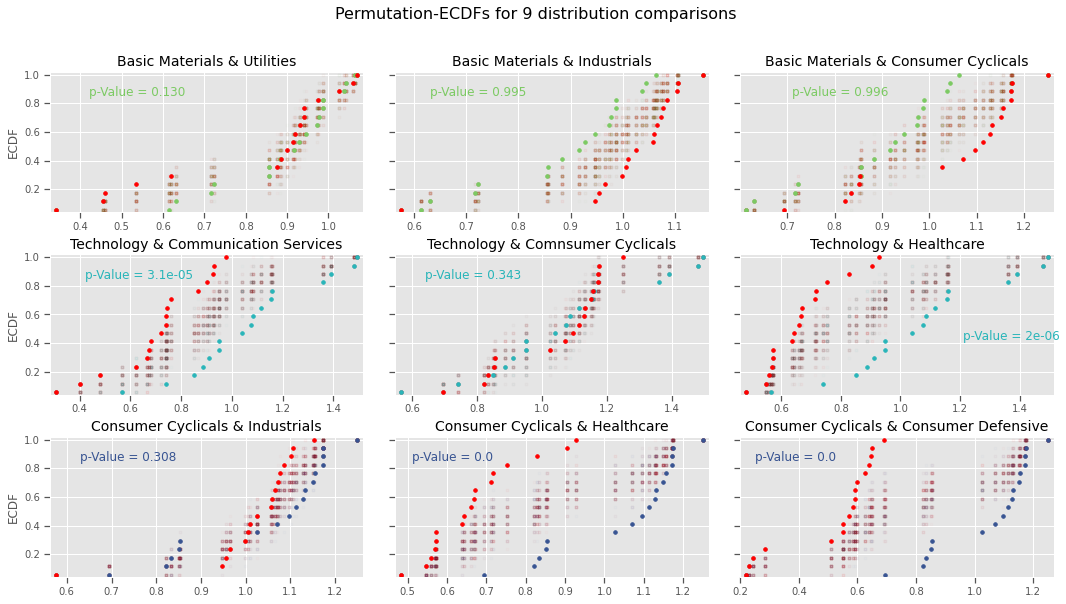

In [ ]:
##### Visualizing Permutation Samples ##########################################

fig, ax = plt.subplots( nrows = 3, ncols = 3, sharey= True, figsize = (18,9))
plt.style.use("ggplot")

###############################################################################################################################################
############ Basic Materials vs. Utilities, Industrials, and Consumer Cyclicals ###############################################################
###############################################################################################################################################

############ Permutation-ECDF: Basic Materials vs. Utilities ###################
for _ in range(100):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(Bas_mat_np, Util_np)
    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)
    # Plot ECDFs of permutation sample
    ax[0,0].plot(x_1, y_1, marker='.', linestyle='none',
                 color="#7CCA63", alpha=0.01)
    ax[0,0].plot(x_2, y_2, marker='.', linestyle='none',
                 color="red", alpha=0.01)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(Bas_mat_np)
x_2, y_2 = ecdf(Util_np)
ax[0,0].plot(x_1, y_1, marker='.', markersize = 7, linestyle='none', color="#7CCA63")
ax[0,0].plot(x_2, y_2, marker='.', markersize = 7, linestyle='none', color="red")
# Label axes, set margin, and show plot
ax[0,0].margins(0.02)
ax[0,0].set_title('Basic Materials & Utilities', fontsize = 14)
ax[0,0].set_ylabel('ECDF', fontsize = 12)

############ Permutation-ECDF: Basic Materials vs. Industrials #################
for _ in range(100):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(Bas_mat_np, Ind_np)
    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)
    # Plot ECDFs of permutation sample
    ax[0,1].plot(x_1, y_1, marker='.', linestyle='none',
                 color="#7CCA63", alpha=0.01)
    ax[0,1].plot(x_2, y_2, marker='.', linestyle='none',
                 color="red", alpha=0.01)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(Bas_mat_np)
x_2, y_2 = ecdf(Ind_np)
ax[0,1].plot(x_1, y_1, marker='.', markersize = 7, linestyle='none', color="#7CCA63")
ax[0,1].plot(x_2, y_2, marker='.', markersize = 7, linestyle='none', color="red")
# Label axes, set margin, and show plot
# Label axes, set margin, and show plot
ax[0,1].margins(0.02)
ax[0,1].set_title('Basic Materials & Industrials', fontsize = 14)
################################################################################

############ Permutation-ECDF: Basic Materials vs. Consumer Cyclicals ##########
for _ in range(100):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(Bas_mat_np, Con_cyc_np)
    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)
    # Plot ECDFs of permutation sample
    ax[0,2].plot(x_1, y_1, marker='.', linestyle='none',
                 color="#7CCA63", alpha=0.01)
    ax[0,2].plot(x_2, y_2, marker='.', linestyle='none',
                 color="red", alpha=0.01)
    
# Create and plot ECDFs from original data
x_1, y_1 = ecdf(Bas_mat_np)
x_2, y_2 = ecdf(Con_cyc_np)
ax[0,2].plot(x_1, y_1, marker = ".", markersize = 7, linestyle="none", color = "#7CCA63")
ax[0,2].plot(x_2, y_2, marker = ".", markersize = 7, linestyle="none", color = "red")
# Label axes, set margin, and show plot
ax[0,2].margins(0.02)
ax[0,2].set_title("Basic Materials & Consumer Cyclicals", fontsize = 14)
################################################################################

##############################################################################################################################################
############ Technology vs. Communication Services, Consumer Cyclicals, and Healthcare #######################################################
##############################################################################################################################################

############ Permutation-ECDF: Technology vs. Communication Services ###########
for _ in range(100):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(Tech_np, Comm_ser_np)
    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)
    # Plot ECDFs of permutation sample
    ax[1,0].plot(x_1, y_1, marker='.', linestyle='none',
                 color="#29B5B9", alpha=0.01)
    ax[1,0].plot(x_2, y_2, marker='.', linestyle='none',
                 color="red", alpha=0.01)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(Tech_np)
x_2, y_2 = ecdf(Comm_ser_np)
ax[1,0].plot(x_1, y_1, marker='.', markersize = 7, linestyle='none', color="#29B5B9")
ax[1,0].plot(x_2, y_2, marker='.', markersize = 7, linestyle='none', color="red")
# Label axes, set margin, and show plot
ax[1,0].margins(0.02)
ax[1,0].set_title('Technology & Communication Services', fontsize = 14)
ax[1,0].set_ylabel('ECDF', fontsize = 12)

############ Permutation-ECDF: Technology vs. Consumer Cyclicals ###############
for _ in range(100):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(Tech_np, Con_cyc_np)
    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)
    # Plot ECDFs of permutation sample
    ax[1,1].plot(x_1, y_1, marker='.', linestyle='none',
                 color="#29B5B9", alpha=0.01)
    ax[1,1].plot(x_2, y_2, marker='.', linestyle='none',
                 color="red", alpha=0.01)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(Tech_np)
x_2, y_2 = ecdf(Con_cyc_np)
ax[1,1].plot(x_1, y_1, marker='.', markersize = 7, linestyle='none', color="#29B5B9")
ax[1,1].plot(x_2, y_2, marker='.', markersize = 7, linestyle='none', color="red")
# Label axes, set margin, and show plot
ax[1,1].margins(0.02)
ax[1,1].set_title('Technology & Comnsumer Cyclicals', fontsize = 14)
################################################################################

############ Permutation-ECDF: Technology vs. Healthcare #######################
for _ in range(100):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(Tech_np, Health_np)
    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)
    # Plot ECDFs of permutation sample
    ax[1,2].plot(x_1, y_1, marker='.', linestyle='none',
                 color="#29B5B9", alpha=0.01)
    ax[1,2].plot(x_2, y_2, marker='.', linestyle='none',
                 color="red", alpha=0.01)
    
# Create and plot ECDFs from original data
x_1, y_1 = ecdf(Tech_np)
x_2, y_2 = ecdf(Health_np)
ax[1,2].plot(x_1, y_1, marker='.', markersize = 7, linestyle = 'none', color = "#29B5B9")
ax[1,2].plot(x_2, y_2, marker='.', markersize = 7, linestyle = 'none', color = "red")
# Label axes, set margin, and show plot
ax[1,2].margins(0.02)
ax[1,2].set_title("Technology & Healthcare", fontsize = 14)
################################################################################

################################################################################################################################################
############ Consumer Cyclicals vs. Industrials, Healthcare and Consumer Defensive #############################################################
################################################################################################################################################

############ Permutation-ECDF: Consumer Cyclicals vs. Industrials ##############
for _ in range(100):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(Con_cyc_np, Ind_np)
    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)
    # Plot ECDFs of permutation sample
    ax[2,0].plot(x_1, y_1, marker='.', linestyle='none',
                 color="#385492", alpha=0.01)
    ax[2,0].plot(x_2, y_2, marker='.', linestyle='none',
                 color="red", alpha=0.01)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(Con_cyc_np)
x_2, y_2 = ecdf(Ind_np)
ax[2,0].plot(x_1, y_1, marker = ".", markersize = 7, linestyle = "none", color = "#385492")
ax[2,0].plot(x_2, y_2, marker = ".", markersize = 7, linestyle = "none", color = "red")
# Label axes, set margin, and show plot
ax[2,0].margins(0.02)
ax[2,0].set_title("Consumer Cyclicals & Industrials", fontsize = 14)
ax[2,0].set_ylabel("ECDF", fontsize = 12)

############ Permutation-ECDF: Consumer Cyclicals vs. Healthcare ###############
for _ in range(100):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(Con_cyc_np, Health_np)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    ax[2,1].plot(x_1, y_1, marker='.', linestyle='none',
                 color="#385492", alpha=0.01)
    ax[2,1].plot(x_2, y_2, marker='.', linestyle='none',
                 color="red", alpha=0.01)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(Con_cyc_np)
x_2, y_2 = ecdf(Health_np)
ax[2,1].plot(x_1, y_1, marker='.', markersize = 7, linestyle='none', color="#385492")
ax[2,1].plot(x_2, y_2, marker='.', markersize = 7, linestyle='none', color="red")

# Label axes, set margin, and show plot
ax[2,1].margins(0.02)
ax[2,1].set_title("Consumer Cyclicals & Healthcare", fontsize = 14)
################################################################################

############ Permutation-ECDF: Consumer Cyclicals vs. Consumer Defensive #######
for _ in range(100):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(Con_cyc_np, Con_def_np)
    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)
    # Plot ECDFs of permutation sample
    ax[2,2].plot(x_1, y_1, marker='.', linestyle='none',
                 color="#385492", alpha=0.01)
    ax[2,2].plot(x_2, y_2, marker='.', linestyle='none',
                 color="red", alpha=0.01)
    
# Create and plot ECDFs from original data
x_1, y_1 = ecdf(Con_cyc_np)
x_2, y_2 = ecdf(Con_def_np)
ax[2,2].plot(x_1, y_1, marker='.', markersize = 7, linestyle='none', color="#385492")
ax[2,2].plot(x_2, y_2, marker='.', markersize = 7, linestyle='none', color="red")
# Label axes, set margin, and show plot
ax[2,2].margins(0.02)
ax[2,2].set_title("Consumer Cyclicals & Consumer Defensive", fontsize = 14)

################################################################################
##### Make Annotations using the calculated p-value of 10.000 Permutations #####
##### Annotations using arrow
ax[0,0].annotate("p-Value = 0.130", xy = (0.42, 0.85), color = "#7CCA63", fontsize = 12)
ax[0,1].annotate("p-Value = 0.995",xy = (0.63, 0.85), color = "#7CCA63", fontsize = 12)
ax[0,2].annotate("p-Value = 0.996",xy = (0.71, 0.85), color = "#7CCA63", fontsize = 12)
ax[1,0].annotate("p-Value = 3.1e-05",xy = (0.42, 0.85), color = "#29B5B9", fontsize = 12)
ax[1,1].annotate("p-Value = 0.343",xy = (0.64, 0.85), color = "#29B5B9", fontsize = 12)
ax[1,2].annotate("p-Value = 2e-06",xy = (1.21, 0.42), color = "#29B5B9", fontsize = 12)
ax[2,0].annotate("p-Value = 0.308",xy = (0.63, 0.85), color = "#385492", fontsize = 12)
ax[2,1].annotate("p-Value = 0.0",xy = (0.51, 0.85), color = "#385492", fontsize = 12)
ax[2,2].annotate("p-Value = 0.0",xy = (0.25, 0.85), color = "#385492", fontsize = 12)

##### Set subplots label sizes and titles ##################################################
##### Reduce tick label size for both y-axis and x-axis equal to 10
ax[0,0].tick_params(axis = "both", labelsize = 10)
ax[0,1].tick_params(axis = "both", labelsize = 10)
ax[0,2].tick_params(axis = "both", labelsize = 10)
ax[1,0].tick_params(axis = "both", labelsize = 10)
ax[1,1].tick_params(axis = "both", labelsize = 10)
ax[1,2].tick_params(axis = "both", labelsize = 10)
ax[2,0].tick_params(axis = "both", labelsize = 10)
ax[2,1].tick_params(axis = "both", labelsize = 10)
ax[2,2].tick_params(axis = "both", labelsize = 10)

plt.subplots_adjust(bottom = 0.1, hspace = 0.3, wspace = 0.1)
plt.suptitle("Permutation-ECDFs for 9 distribution comparisons", fontsize = 16)

plt.show()

None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data. Betas are not identically distributed.

### Heatmap of Test-statistics of Permutation Samples

**e) Compute p-Values**

**Goal:** 
Quantify the difference in the distribution based on the difference of their means as a test statistic during this Permutation Method.

**Test-Statistics:**
1. Difference of means
2. Median
3. 75%-CI 
4. 90%-CI
5. 95%-CI

In [ ]:

###### (2) Define Function for Permutation Replicates ###########################################################
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

**e1) Compute p-Value for Test-statistic: Difference of means**

In [ ]:
###### (1) Define Function for Permutation Test Statistic: Difference of Means #
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [ ]:
############ p-Value of Permutation: Basic Materials vs. Utilities #############
empirical_diff_means_Bas_Util = diff_of_means(Bas_mat_np, Util_np)
perm_reps_Bas_Util = draw_perm_reps(Bas_mat_np, Util_np, diff_of_means, size = 10000)
p_mean_BasUtil = np.sum(perm_reps_Bas_Util >= empirical_diff_means_Bas_Util) / len(perm_reps_Bas_Util)

############ p-Value of Permutation: Basic Materials vs. Industrials ###########
empirical_diff_means_Bas_Ind = diff_of_means(Bas_mat_np, Ind_np)
perm_reps_Bas_Ind = draw_perm_reps(Bas_mat_np, Ind_np, diff_of_means, size = 10000)
p_mean_BasInd = np.sum(perm_reps_Bas_Ind >= empirical_diff_means_Bas_Ind) / len(perm_reps_Bas_Ind)

############ p-Value of Permutation: Basic Materials vs. Consumer Cyclicals ####
empirical_diff_means_Bas_Con_cyc = diff_of_means(Bas_mat_np, Con_cyc_np)
perm_reps_Bas_Con_cyc = draw_perm_reps(Bas_mat_np, Con_cyc_np, diff_of_means, size = 10000)
p_mean_BasCon_cyc = np.sum(perm_reps_Bas_Con_cyc >= empirical_diff_means_Bas_Con_cyc) / len(perm_reps_Bas_Con_cyc)

############ p-Value of Permutation: Technology vs. Communication Services #####
empirical_diff_means_Tech_Comm = diff_of_means(Tech_np, Comm_ser_np)
perm_reps_Tech_Comm = draw_perm_reps(Tech_np, Comm_ser_np, diff_of_means, size = 10000)
p_mean_TechComm = np.sum(perm_reps_Tech_Comm >= empirical_diff_means_Tech_Comm) / len(perm_reps_Tech_Comm)

############ p-Value of Permutation: Technology vs. Consumer Cyclicals #########
empirical_diff_means_Tech_Con_cyc = diff_of_means(Tech_np, Con_cyc_np)
perm_reps_Tech_Con_cyc = draw_perm_reps(Tech_np, Con_cyc_np, diff_of_means, size = 10000)
p_mean_TechCon_cyc = np.sum(perm_reps_Tech_Con_cyc >= empirical_diff_means_Tech_Con_cyc) / len(perm_reps_Tech_Con_cyc)

############ p-Value of Permutation: Technology vs. Healthcare #################
empirical_diff_means_Tech_Health = diff_of_means(Tech_np, Health_np)
perm_reps_Tech_Health = draw_perm_reps(Tech_np, Health_np, diff_of_means, size = 10000)
p_mean_TechHealth = np.sum(perm_reps_Tech_Health >= empirical_diff_means_Tech_Health) / len(perm_reps_Tech_Health)

############ p-Value of Permutation: Consumer Cyclicals vs. Industrials ########
empirical_diff_means_Con_cyc_Ind = diff_of_means(Con_cyc_np, Ind_np)
perm_reps_Con_cyc_Ind= draw_perm_reps(Con_cyc_np, Ind_np, diff_of_means, size = 10000)
p_mean_Con_cycInd = np.sum(perm_reps_Con_cyc_Ind >= empirical_diff_means_Con_cyc_Ind) / len(perm_reps_Con_cyc_Ind)

############ p-Value of Permutation: Consumer Cyclicals vs. Healthcare #########
empirical_diff_means_Con_cyc_Health = diff_of_means(Con_cyc_np, Health_np)
perm_reps_Con_cyc_Health = draw_perm_reps(Con_cyc_np, Health_np, diff_of_means, size = 10000)
p_mean_Con_cycHealth = np.sum(perm_reps_Con_cyc_Health >= empirical_diff_means_Con_cyc_Health) / len(perm_reps_Con_cyc_Health)

############ p-Value of Permutation: Consumer Cyclicals vs. Consumer Defensive #
empirical_diff_means_Con_cyc_Con_def = diff_of_means(Con_cyc_np, Con_def_np)
perm_reps_Con_cyc_Con_def = draw_perm_reps(Con_cyc_np, Con_def_np, diff_of_means, size = 10000)
p_mean_Con_cycCon_def = np.sum(perm_reps_Con_cyc_Con_def >= empirical_diff_means_Con_cyc_Con_def) / len(perm_reps_Con_cyc_Con_def)

print("Diff_of_means p-Value of Basic Materials and Utilities Permutation =", p_mean_BasUtil)
print("Diff_of_means p-Value of Basic Materials and Industrials Permutation =", p_mean_BasInd)
print("Diff_of_means p-Value of Basic Materials and Consumer Cyclicals Permutation =", p_mean_BasCon_cyc)
print("Diff_of_means p-Value of Technology and Communication Services Permutation =", p_mean_TechComm)
print("Diff_of_means p-Value of Technology and Consumer Cyclicals Permutation =", p_mean_TechCon_cyc)
print("Diff_of_means p-Value of Technology and Healthcare Permutation =", p_mean_TechHealth)
print("Diff_of_means p-Value of Consumer Cyclicals and Utilities Permutation =", p_mean_Con_cycInd)
print("Diff_of_means p-Value of Consumer Cyclicals and Healthcare Permutation =", p_mean_Con_cycHealth)
print("Diff_of_means p-Value of Consumer Cyclicals and Consumer Defensive Permutation =", p_mean_Con_cycCon_def)

Diff_of_means p-Value of Basic Materials and Utilities Permutation = 0.1339
Diff_of_means p-Value of Basic Materials and Industrials Permutation = 0.9955
Diff_of_means p-Value of Basic Materials and Consumer Cyclicals Permutation = 0.9961
Diff_of_means p-Value of Technology and Communication Services Permutation = 0.0001
Diff_of_means p-Value of Technology and Consumer Cyclicals Permutation = 0.3466
Diff_of_means p-Value of Technology and Healthcare Permutation = 0.0
Diff_of_means p-Value of Consumer Cyclicals and Utilities Permutation = 0.3051
Diff_of_means p-Value of Consumer Cyclicals and Healthcare Permutation = 0.0
Diff_of_means p-Value of Consumer Cyclicals and Consumer Defensive Permutation = 0.0


In [ ]:
##### Prepare p-Values as NumPy-arrays to concatenate into a pd.DataFrame #################################
p_means_array = [p_mean_BasUtil, p_mean_BasInd, p_mean_BasCon_cyc, p_mean_TechComm, p_mean_TechCon_cyc, 
                   p_mean_TechHealth, p_mean_Con_cycInd, p_mean_Con_cycHealth, p_mean_Con_cycCon_def]
p_means_array

[0.1339, 0.9955, 0.9961, 0.0001, 0.3466, 0.0, 0.3051, 0.0, 0.0]

**e2) Compute p-Value für Test-statistic: Difference of Median**

In [ ]:
###### (1) Define Function for Permutation Test Statistic: Difference of Means ############
def diff_of_medians(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.median(data_1) - np.median(data_2)

    return diff

In [ ]:
############ p-Value of Permutation: Basic Materials vs. Utilities ######################################
empirical_diff_med_BasUtil = diff_of_medians(Bas_mat_np, Util_np)
perm_reps_med_BasUtil = draw_perm_reps(Bas_mat_np, Util_np, diff_of_medians, size = 10000)
p_med_BasUtil = np.sum(perm_reps_med_BasUtil >= empirical_diff_med_BasUtil) / len(perm_reps_med_BasUtil)

############ p-Value of Permutation: Basic Materials vs. Industrials ####################################
empirical_diff_med_BasInd = diff_of_medians(Bas_mat_np, Ind_np)
perm_reps_med_BasInd = draw_perm_reps(Bas_mat_np, Ind_np, diff_of_medians, size = 10000)
p_med_BasInd = np.sum(perm_reps_med_BasInd >= empirical_diff_med_BasInd) / len(perm_reps_med_BasInd)

############ p-Value of Permutation: Basic Materials vs. Consumer Cyclicals #############################
empirical_diff_med_BasCon_cyc = diff_of_medians(Bas_mat_np, Con_cyc_np)
perm_reps_med_BasCon_cyc = draw_perm_reps(Bas_mat_np, Con_cyc_np, diff_of_medians, size = 10000)
p_med_BasCon_cyc = np.sum(perm_reps_med_BasCon_cyc >= empirical_diff_med_BasCon_cyc) / len(perm_reps_med_BasCon_cyc)

############ p-Value of Permutation: Technology vs. Communication Services ##############################
empirical_diff_med_TechComm = diff_of_medians(Tech_np, Comm_ser_np)
perm_reps_med_TechComm = draw_perm_reps(Tech_np, Comm_ser_np, diff_of_medians, size = 10000)
p_med_TechComm = np.sum(perm_reps_med_TechComm >= empirical_diff_med_TechComm) / len(perm_reps_med_TechComm)

############ p-Value of Permutation: Technology vs. Consumer Cyclicals ##################################
empirical_diff_med_TechCon_cyc = diff_of_medians(Tech_np, Con_cyc_np)
perm_reps_med_TechCon_cyc = draw_perm_reps(Tech_np, Con_cyc_np, diff_of_medians, size = 10000)
p_med_TechCon_cyc = np.sum(perm_reps_med_TechCon_cyc >= empirical_diff_med_TechCon_cyc) / len(perm_reps_med_TechCon_cyc)

############ p-Value of Permutation: Technology vs. Healthcare ##########################################
empirical_diff_med_TechHealth = diff_of_medians(Tech_np, Health_np)
perm_reps_med_TechHealth = draw_perm_reps(Tech_np, Health_np, diff_of_medians, size = 10000)
p_med_TechHealth = np.sum(perm_reps_med_TechHealth >= empirical_diff_med_TechHealth) / len(perm_reps_med_TechHealth)

############ p-Value of Permutation: Consumer Cyclicals vs. Industrials #################################
empirical_diff_med_Con_cycInd = diff_of_medians(Con_cyc_np, Ind_np)
perm_reps_med_Con_cycInd= draw_perm_reps(Con_cyc_np, Ind_np, diff_of_medians, size = 10000)
p_med_Con_cycInd = np.sum(perm_reps_med_Con_cycInd >= empirical_diff_med_Con_cycInd) / len(perm_reps_med_Con_cycInd)

############ p-Value of Permutation: Consumer Cyclicals vs. Healthcare ##################################
empirical_diff_med_Con_cycHealth = diff_of_medians(Con_cyc_np, Health_np)
perm_reps_med_Con_cycHealth = draw_perm_reps(Con_cyc_np, Health_np, diff_of_medians, size = 10000)
p_med_Con_cycHealth = np.sum(perm_reps_med_Con_cycHealth >= empirical_diff_med_Con_cycHealth) / len(perm_reps_med_Con_cycHealth)

############ p-Value of Permutation: Consumer Cyclicals vs. Consumer Defensive ##########################
empirical_diff_med_Con_cycCon_def = diff_of_medians(Con_cyc_np, Con_def_np)
perm_reps_med_Con_cycCon_def = draw_perm_reps(Con_cyc_np, Con_def_np, diff_of_medians, size = 10000)
p_med_Con_cycCon_def = np.sum(perm_reps_med_Con_cycCon_def >= empirical_diff_med_Con_cycCon_def) / len(perm_reps_med_Con_cycCon_def)

print("Diff_of_medians p-Value of Basic Materials and Utilities Permutation =", p_med_BasUtil)
print("Diff_of_medians p-Value of Basic Materials and Industrials Permutation =", p_med_BasInd)
print("Diff_of_medians p-Value of Basic Materials and Consumer Cyclicals Permutation =", p_med_BasCon_cyc)
print("Diff_of_medians p-Value of Technology and Communication Services Permutation =", p_med_TechComm)
print("Diff_of_medians p-Value of Technology and Consumer Cyclicals Permutation =", p_med_TechCon_cyc)
print("Diff_of_medians p-Value of Technology and Healthcare Permutation =", p_med_TechHealth)
print("Diff_of_medians p-Value of Consumer Cyclicals and Utilities Permutation =", p_med_Con_cycInd)
print("Diff_of_medians p-Value of Consumer Cyclicals and Healthcare Permutation =", p_med_Con_cycHealth)
print("Diff_of_medians p-Value of Consumer Cyclicals and Consumer Defensive Permutation =", p_med_Con_cycCon_def)

Diff_of_medians p-Value of Basic Materials and Utilities Permutation = 0.369
Diff_of_medians p-Value of Basic Materials and Industrials Permutation = 1.0
Diff_of_medians p-Value of Basic Materials and Consumer Cyclicals Permutation = 0.9931
Diff_of_medians p-Value of Technology and Communication Services Permutation = 0.0003
Diff_of_medians p-Value of Technology and Consumer Cyclicals Permutation = 0.716
Diff_of_medians p-Value of Technology and Healthcare Permutation = 0.0
Diff_of_medians p-Value of Consumer Cyclicals and Utilities Permutation = 0.0904
Diff_of_medians p-Value of Consumer Cyclicals and Healthcare Permutation = 0.0
Diff_of_medians p-Value of Consumer Cyclicals and Consumer Defensive Permutation = 0.0


In [ ]:
##### Prepare p-Values as NumPy-arrays to concatenate into a pd.DataFrame #################################
p_medians_array = [p_med_BasUtil, p_med_BasInd, p_med_BasCon_cyc, p_med_TechComm, p_med_TechCon_cyc, 
                   p_med_TechHealth, p_med_Con_cycInd, p_med_Con_cycHealth, p_med_Con_cycCon_def]               
p_medians_array


[0.369, 1.0, 0.9931, 0.0003, 0.716, 0.0, 0.0904, 0.0, 0.0]

**e3) Compute p-Value für Test-statistic: 75%-Confidence-interval**

In [ ]:
###### (1) Define Function for Permutation Test Statistic: 75%-Confidence Interval ############
def diff_of_ci75(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.percentile(data_1,75) - np.percentile(data_2, 75)

    return diff

In [ ]:
############ p-Value of Permutation: Basic Materials vs. Utilities ######################################
empirical_diff_ci75_BasUtil = diff_of_ci75(Bas_mat_np, Util_np)
perm_reps_ci75_BasUtil = draw_perm_reps(Bas_mat_np, Util_np, diff_of_ci75, size = 10000)
p_ci75_BasUtil = np.sum(perm_reps_ci75_BasUtil >= empirical_diff_ci75_BasUtil) / len(perm_reps_ci75_BasUtil)

############ p-Value of Permutation: Basic Materials vs. Industrials ####################################
empirical_diff_ci75_BasInd = diff_of_ci75(Bas_mat_np, Ind_np)
perm_reps_ci75_BasInd = draw_perm_reps(Bas_mat_np, Ind_np, diff_of_ci75, size = 10000)
p_ci75_BasInd = np.sum(perm_reps_ci75_BasInd >= empirical_diff_ci75_BasInd) / len(perm_reps_ci75_BasInd)

############ p-Value of Permutation: Basic Materials vs. Consumer Cyclicals #############################
empirical_diff_ci75_BasCon_cyc = diff_of_ci75(Bas_mat_np, Con_cyc_np)
perm_reps_ci75_BasCon_cyc = draw_perm_reps(Bas_mat_np, Con_cyc_np, diff_of_ci75, size = 10000)
p_ci75_BasCon_cyc = np.sum(perm_reps_ci75_BasCon_cyc >= empirical_diff_ci75_BasCon_cyc) / len(perm_reps_ci75_BasCon_cyc)

############ p-Value of Permutation: Technology vs. Communication Services ##############################
empirical_diff_ci75_TechComm = diff_of_ci75(Tech_np, Comm_ser_np)
perm_reps_ci75_TechComm = draw_perm_reps(Tech_np, Comm_ser_np, diff_of_ci75, size = 10000)
p_ci75_TechComm = np.sum(perm_reps_ci75_TechComm >= empirical_diff_ci75_TechComm) / len(perm_reps_ci75_TechComm)

############ p-Value of Permutation: Technology vs. Consumer Cyclicals ##################################
empirical_diff_ci75_TechCon_cyc = diff_of_ci75(Tech_np, Con_cyc_np)
perm_reps_ci75_TechCon_cyc = draw_perm_reps(Tech_np, Con_cyc_np, diff_of_ci75, size = 10000)
p_ci75_TechCon_cyc = np.sum(perm_reps_ci75_TechCon_cyc >= empirical_diff_ci75_TechCon_cyc) / len(perm_reps_ci75_TechCon_cyc)

############ p-Value of Permutation: Technology vs. Healthcare ##########################################
empirical_diff_ci75_TechHealth = diff_of_ci75(Tech_np, Health_np)
perm_reps_ci75_TechHealth = draw_perm_reps(Tech_np, Health_np, diff_of_ci75, size = 10000)
p_ci75_TechHealth = np.sum(perm_reps_ci75_TechHealth >= empirical_diff_ci75_TechHealth) / len(perm_reps_ci75_TechHealth)

############ p-Value of Permutation: Consumer Cyclicals vs. Industrials #################################
empirical_diff_ci75_Con_cycInd = diff_of_ci75(Con_cyc_np, Ind_np)
perm_reps_ci75_Con_cycInd= draw_perm_reps(Con_cyc_np, Ind_np, diff_of_ci75, size = 10000)
p_ci75_Con_cycInd = np.sum(perm_reps_ci75_Con_cycInd >= empirical_diff_ci75_Con_cycInd) / len(perm_reps_ci75_Con_cycInd)

############ p-Value of Permutation: Consumer Cyclicals vs. Healthcare ##################################
empirical_diff_ci75_Con_cycHealth = diff_of_ci75(Con_cyc_np, Health_np)
perm_reps_ci75_Con_cycHealth = draw_perm_reps(Con_cyc_np, Health_np, diff_of_ci75, size = 10000)
p_ci75_Con_cycHealth = np.sum(perm_reps_ci75_Con_cycHealth >= empirical_diff_ci75_Con_cycHealth) / len(perm_reps_ci75_Con_cycHealth)

############ p-Value of Permutation: Consumer Cyclicals vs. Consumer Defensive ##########################
empirical_diff_ci75_Con_cycCon_def = diff_of_ci75(Con_cyc_np, Con_def_np)
perm_reps_ci75_Con_cycCon_def = draw_perm_reps(Con_cyc_np, Con_def_np, diff_of_ci75, size = 10000)
p_ci75_Con_cycCon_def = np.sum(perm_reps_ci75_Con_cycCon_def >= empirical_diff_ci75_Con_cycCon_def) / len(perm_reps_ci75_Con_cycCon_def)

print("Diff_of_medians p-Value of Basic Materials and Utilities Permutation =", p_ci75_BasUtil)
print("Diff_of_medians p-Value of Basic Materials and Industrials Permutation =", p_ci75_BasInd)
print("Diff_of_medians p-Value of Basic Materials and Consumer Cyclicals Permutation =", p_ci75_BasCon_cyc)
print("Diff_of_medians p-Value of Technology and Communication Services Permutation =", p_ci75_TechComm)
print("Diff_of_medians p-Value of Technology and Consumer Cyclicals Permutation =", p_ci75_TechCon_cyc)
print("Diff_of_medians p-Value of Technology and Healthcare Permutation =", p_ci75_TechHealth)
print("Diff_of_medians p-Value of Consumer Cyclicals and Utilities Permutation =", p_ci75_Con_cycInd)
print("Diff_of_medians p-Value of Consumer Cyclicals and Healthcare Permutation =", p_ci75_Con_cycHealth)
print("Diff_of_medians p-Value of Consumer Cyclicals and Consumer Defensive Permutation =", p_ci75_Con_cycCon_def)

Diff_of_medians p-Value of Basic Materials and Utilities Permutation = 0.1656
Diff_of_medians p-Value of Basic Materials and Industrials Permutation = 0.9994
Diff_of_medians p-Value of Basic Materials and Consumer Cyclicals Permutation = 0.9987
Diff_of_medians p-Value of Technology and Communication Services Permutation = 0.0002
Diff_of_medians p-Value of Technology and Consumer Cyclicals Permutation = 0.5029
Diff_of_medians p-Value of Technology and Healthcare Permutation = 0.0
Diff_of_medians p-Value of Consumer Cyclicals and Utilities Permutation = 0.0139
Diff_of_medians p-Value of Consumer Cyclicals and Healthcare Permutation = 0.0
Diff_of_medians p-Value of Consumer Cyclicals and Consumer Defensive Permutation = 0.0


In [ ]:
##### Prepare p-Values as NumPy-arrays to concatenate into a pd.DataFrame #################################
p_ci75_array = [p_ci75_BasUtil, p_ci75_BasInd, p_ci75_BasCon_cyc, p_ci75_TechComm, p_ci75_TechCon_cyc, 
                   p_ci75_TechHealth, p_ci75_Con_cycInd, p_ci75_Con_cycHealth, p_ci75_Con_cycCon_def]
p_ci75_array

[0.1656, 0.9994, 0.9987, 0.0002, 0.5029, 0.0, 0.0139, 0.0, 0.0]

**e4) Compute p-Value for Test-statistic: 90%-Confidence-interval**

In [ ]:
###### (1) Define Function for Permutation Test Statistic: 90%-Confidence Interval ############
def diff_of_ci90(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.percentile(data_1,90) - np.percentile(data_2, 90)

    return diff

In [ ]:
############ p-Value of Permutation: Basic Materials vs. Utilities ######################################
empirical_diff_ci90_BasUtil = diff_of_ci90(Bas_mat_np, Util_np)
perm_reps_ci90_BasUtil = draw_perm_reps(Bas_mat_np, Util_np, diff_of_ci90, size = 10000)
p_ci90_BasUtil = np.sum(perm_reps_ci90_BasUtil >= empirical_diff_ci90_BasUtil) / len(perm_reps_ci90_BasUtil)

############ p-Value of Permutation: Basic Materials vs. Industrials ####################################
empirical_diff_ci90_BasInd = diff_of_ci90(Bas_mat_np, Ind_np)
perm_reps_ci90_BasInd = draw_perm_reps(Bas_mat_np, Ind_np, diff_of_ci90, size = 10000)
p_ci90_BasInd = np.sum(perm_reps_ci90_BasInd >= empirical_diff_ci90_BasInd) / len(perm_reps_ci90_BasInd)

############ p-Value of Permutation: Basic Materials vs. Consumer Cyclicals #############################
empirical_diff_ci90_BasCon_cyc = diff_of_ci90(Bas_mat_np, Con_cyc_np)
perm_reps_ci90_BasCon_cyc = draw_perm_reps(Bas_mat_np, Con_cyc_np, diff_of_ci90, size = 10000)
p_ci90_BasCon_cyc = np.sum(perm_reps_ci90_BasCon_cyc >= empirical_diff_ci90_BasCon_cyc) / len(perm_reps_ci90_BasCon_cyc)

############ p-Value of Permutation: Technology vs. Communication Services ##############################
empirical_diff_ci90_TechComm = diff_of_ci90(Tech_np, Comm_ser_np)
perm_reps_ci90_TechComm = draw_perm_reps(Tech_np, Comm_ser_np, diff_of_ci90, size = 10000)
p_ci90_TechComm = np.sum(perm_reps_ci90_TechComm >= empirical_diff_ci90_TechComm) / len(perm_reps_ci90_TechComm)

############ p-Value of Permutation: Technology vs. Consumer Cyclicals ##################################
empirical_diff_ci90_TechCon_cyc = diff_of_ci90(Tech_np, Con_cyc_np)
perm_reps_ci90_TechCon_cyc = draw_perm_reps(Tech_np, Con_cyc_np, diff_of_ci90, size = 10000)
p_ci90_TechCon_cyc = np.sum(perm_reps_ci90_TechCon_cyc >= empirical_diff_ci90_TechCon_cyc) / len(perm_reps_ci90_TechCon_cyc)

############ p-Value of Permutation: Technology vs. Healthcare ##########################################
empirical_diff_ci90_TechHealth = diff_of_ci90(Tech_np, Health_np)
perm_reps_ci90_TechHealth = draw_perm_reps(Tech_np, Health_np, diff_of_ci90, size = 10000)
p_ci90_TechHealth = np.sum(perm_reps_ci90_TechHealth >= empirical_diff_ci90_TechHealth) / len(perm_reps_ci90_TechHealth)

############ p-Value of Permutation: Consumer Cyclicals vs. Industrials #################################
empirical_diff_ci90_Con_cycInd = diff_of_ci90(Con_cyc_np, Ind_np)
perm_reps_ci90_Con_cycInd= draw_perm_reps(Con_cyc_np, Ind_np, diff_of_ci90, size = 10000)
p_ci90_Con_cycInd = np.sum(perm_reps_ci90_Con_cycInd >= empirical_diff_ci90_Con_cycInd) / len(perm_reps_ci90_Con_cycInd)

############ p-Value of Permutation: Consumer Cyclicals vs. Healthcare ##################################
empirical_diff_ci90_Con_cycHealth = diff_of_ci90(Con_cyc_np, Health_np)
perm_reps_ci90_Con_cycHealth = draw_perm_reps(Con_cyc_np, Health_np, diff_of_ci90, size = 10000)
p_ci90_Con_cycHealth = np.sum(perm_reps_ci90_Con_cycHealth >= empirical_diff_ci90_Con_cycHealth) / len(perm_reps_ci90_Con_cycHealth)

############ p-Value of Permutation: Consumer Cyclicals vs. Consumer Defensive ##########################
empirical_diff_ci90_Con_cycCon_def = diff_of_ci90(Con_cyc_np, Con_def_np)
perm_reps_ci90_Con_cycCon_def = draw_perm_reps(Con_cyc_np, Con_def_np, diff_of_ci90, size = 10000)
p_ci90_Con_cycCon_def = np.sum(perm_reps_ci90_Con_cycCon_def >= empirical_diff_ci90_Con_cycCon_def) / len(perm_reps_ci90_Con_cycCon_def)

print("Diff_of_medians p-Value of Basic Materials and Utilities Permutation =", p_ci90_BasUtil)
print("Diff_of_medians p-Value of Basic Materials and Industrials Permutation =", p_ci90_BasInd)
print("Diff_of_medians p-Value of Basic Materials and Consumer Cyclicals Permutation =", p_ci90_BasCon_cyc)
print("Diff_of_medians p-Value of Technology and Communication Services Permutation =", p_ci90_TechComm)
print("Diff_of_medians p-Value of Technology and Consumer Cyclicals Permutation =", p_ci90_TechCon_cyc)
print("Diff_of_medians p-Value of Technology and Healthcare Permutation =", p_ci90_TechHealth)
print("Diff_of_medians p-Value of Consumer Cyclicals and Utilities Permutation =", p_ci90_Con_cycInd)
print("Diff_of_medians p-Value of Consumer Cyclicals and Healthcare Permutation =", p_ci90_Con_cycHealth)
print("Diff_of_medians p-Value of Consumer Cyclicals and Consumer Defensive Permutation =", p_ci90_Con_cycCon_def)

Diff_of_medians p-Value of Basic Materials and Utilities Permutation = 0.4996
Diff_of_medians p-Value of Basic Materials and Industrials Permutation = 0.9976
Diff_of_medians p-Value of Basic Materials and Consumer Cyclicals Permutation = 0.9998
Diff_of_medians p-Value of Technology and Communication Services Permutation = 0.0002
Diff_of_medians p-Value of Technology and Consumer Cyclicals Permutation = 0.0818
Diff_of_medians p-Value of Technology and Healthcare Permutation = 0.0
Diff_of_medians p-Value of Consumer Cyclicals and Utilities Permutation = 0.0033
Diff_of_medians p-Value of Consumer Cyclicals and Healthcare Permutation = 0.0
Diff_of_medians p-Value of Consumer Cyclicals and Consumer Defensive Permutation = 0.0


In [ ]:
##### Prepare p-Values as NumPy-arrays to concatenate into a pd.DataFrame #################################
p_ci90_array = [p_ci90_BasUtil, p_ci90_BasInd, p_ci90_BasCon_cyc, p_ci90_TechComm, p_ci90_TechCon_cyc, 
                   p_ci90_TechHealth, p_ci90_Con_cycInd, p_ci90_Con_cycHealth, p_ci90_Con_cycCon_def]
p_ci90_array

[0.4996, 0.9976, 0.9998, 0.0002, 0.0818, 0.0, 0.0033, 0.0, 0.0]

**e5) Compute p-Value für Test-statistic: 95%-Confidence-interval**

In [ ]:
###### (1) Define Function for Permutation Test Statistic: 90%-Confidence Interval ############
def diff_of_ci95(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.percentile(data_1,90) - np.percentile(data_2, 90)

    return diff

In [ ]:
############ p-Value of Permutation: Basic Materials vs. Utilities ######################################
empirical_diff_ci95_BasUtil = diff_of_ci95(Bas_mat_np, Util_np)
perm_reps_ci95_BasUtil = draw_perm_reps(Bas_mat_np, Util_np, diff_of_ci95, size = 10000)
p_ci95_BasUtil = np.sum(perm_reps_ci95_BasUtil >= empirical_diff_ci95_BasUtil) / len(perm_reps_ci95_BasUtil)

############ p-Value of Permutation: Basic Materials vs. Industrials ####################################
empirical_diff_ci95_BasInd = diff_of_ci95(Bas_mat_np, Ind_np)
perm_reps_ci95_BasInd = draw_perm_reps(Bas_mat_np, Ind_np, diff_of_ci95, size = 10000)
p_ci95_BasInd = np.sum(perm_reps_ci95_BasInd >= empirical_diff_ci95_BasInd) / len(perm_reps_ci95_BasInd)

############ p-Value of Permutation: Basic Materials vs. Consumer Cyclicals #############################
empirical_diff_ci95_BasCon_cyc = diff_of_ci95(Bas_mat_np, Con_cyc_np)
perm_reps_ci95_BasCon_cyc = draw_perm_reps(Bas_mat_np, Con_cyc_np, diff_of_ci95, size = 10000)
p_ci95_BasCon_cyc = np.sum(perm_reps_ci95_BasCon_cyc >= empirical_diff_ci95_BasCon_cyc) / len(perm_reps_ci95_BasCon_cyc)

############ p-Value of Permutation: Technology vs. Communication Services ##############################
empirical_diff_ci95_TechComm = diff_of_ci95(Tech_np, Comm_ser_np)
perm_reps_ci95_TechComm = draw_perm_reps(Tech_np, Comm_ser_np, diff_of_ci95, size = 10000)
p_ci95_TechComm = np.sum(perm_reps_ci95_TechComm >= empirical_diff_ci95_TechComm) / len(perm_reps_ci95_TechComm)

############ p-Value of Permutation: Technology vs. Consumer Cyclicals ##################################
empirical_diff_ci95_TechCon_cyc = diff_of_ci95(Tech_np, Con_cyc_np)
perm_reps_ci95_TechCon_cyc = draw_perm_reps(Tech_np, Con_cyc_np, diff_of_ci95, size = 10000)
p_ci95_TechCon_cyc = np.sum(perm_reps_ci95_TechCon_cyc >= empirical_diff_ci95_TechCon_cyc) / len(perm_reps_ci95_TechCon_cyc)

############ p-Value of Permutation: Technology vs. Healthcare ##########################################
empirical_diff_ci95_TechHealth = diff_of_ci95(Tech_np, Health_np)
perm_reps_ci95_TechHealth = draw_perm_reps(Tech_np, Health_np, diff_of_ci95, size = 10000)
p_ci95_TechHealth = np.sum(perm_reps_ci95_TechHealth >= empirical_diff_ci95_TechHealth) / len(perm_reps_ci95_TechHealth)

############ p-Value of Permutation: Consumer Cyclicals vs. Industrials #################################
empirical_diff_ci95_Con_cycInd = diff_of_ci95(Con_cyc_np, Ind_np)
perm_reps_ci95_Con_cycInd= draw_perm_reps(Con_cyc_np, Ind_np, diff_of_ci95, size = 10000)
p_ci95_Con_cycInd = np.sum(perm_reps_ci95_Con_cycInd >= empirical_diff_ci95_Con_cycInd) / len(perm_reps_ci95_Con_cycInd)

############ p-Value of Permutation: Consumer Cyclicals vs. Healthcare ##################################
empirical_diff_ci95_Con_cycHealth = diff_of_ci95(Con_cyc_np, Health_np)
perm_reps_ci95_Con_cycHealth = draw_perm_reps(Con_cyc_np, Health_np, diff_of_ci95, size = 10000)
p_ci95_Con_cycHealth = np.sum(perm_reps_ci95_Con_cycHealth >= empirical_diff_ci95_Con_cycHealth) / len(perm_reps_ci95_Con_cycHealth)

############ p-Value of Permutation: Consumer Cyclicals vs. Consumer Defensive ##########################
empirical_diff_ci95_Con_cycCon_def = diff_of_ci95(Con_cyc_np, Con_def_np)
perm_reps_ci95_Con_cycCon_def = draw_perm_reps(Con_cyc_np, Con_def_np, diff_of_ci95, size = 10000)
p_ci95_Con_cycCon_def = np.sum(perm_reps_ci95_Con_cycCon_def >= empirical_diff_ci95_Con_cycCon_def) / len(perm_reps_ci95_Con_cycCon_def)

print("Diff_of_medians p-Value of Basic Materials and Utilities Permutation =", p_ci95_BasUtil)
print("Diff_of_medians p-Value of Basic Materials and Industrials Permutation =", p_ci95_BasInd)
print("Diff_of_medians p-Value of Basic Materials and Consumer Cyclicals Permutation =", p_ci95_BasCon_cyc)
print("Diff_of_medians p-Value of Technology and Communication Services Permutation =", p_ci95_TechComm)
print("Diff_of_medians p-Value of Technology and Consumer Cyclicals Permutation =", p_ci95_TechCon_cyc)
print("Diff_of_medians p-Value of Technology and Healthcare Permutation =", p_ci95_TechHealth)
print("Diff_of_medians p-Value of Consumer Cyclicals and Utilities Permutation =", p_ci95_Con_cycInd)
print("Diff_of_medians p-Value of Consumer Cyclicals and Healthcare Permutation =", p_ci95_Con_cycHealth)
print("Diff_of_medians p-Value of Consumer Cyclicals and Consumer Defensive Permutation =", p_ci95_Con_cycCon_def)

Diff_of_medians p-Value of Basic Materials and Utilities Permutation = 0.4897
Diff_of_medians p-Value of Basic Materials and Industrials Permutation = 0.9979
Diff_of_medians p-Value of Basic Materials and Consumer Cyclicals Permutation = 0.9997
Diff_of_medians p-Value of Technology and Communication Services Permutation = 0.0
Diff_of_medians p-Value of Technology and Consumer Cyclicals Permutation = 0.0805
Diff_of_medians p-Value of Technology and Healthcare Permutation = 0.0
Diff_of_medians p-Value of Consumer Cyclicals and Utilities Permutation = 0.0042
Diff_of_medians p-Value of Consumer Cyclicals and Healthcare Permutation = 0.0001
Diff_of_medians p-Value of Consumer Cyclicals and Consumer Defensive Permutation = 0.0


In [ ]:
##### Prepare p-Values as NumPy-arrays to concatenate into a pd.DataFrame #################################
p_ci95_array = [p_ci95_BasUtil, p_ci95_BasInd, p_ci95_BasCon_cyc, p_ci95_TechComm, p_ci95_TechCon_cyc, 
                   p_ci95_TechHealth, p_ci95_Con_cycInd, p_ci95_Con_cycHealth, p_ci95_Con_cycCon_def]
p_ci95_array

[0.4897, 0.9979, 0.9997, 0.0, 0.0805, 0.0, 0.0042, 0.0001, 0.0]

**e6) Create Data-fram**

**Struktur:**
- Rows: 5 Test-statistics (Mean, Median, ci75, ci90, ci95)
- Columns: 9 Sector-Comparisons

In [ ]:
pvalues_df = pd.DataFrame([p_means_array, p_medians_array, p_ci75_array, p_ci90_array, p_ci95_array], 
                  index = ["p-Value: Difference of Means", "p-Value: Difference of Medians", "p-Value: Difference of 75%-CI", 
                           "p-Value: Difference of 90%-CI", "p-Value: Difference of 95%-CI"],
                columns = ["Basic Materials & Utilities", "Basic Materials & Industrials", "Basic Materials & Consumer Cyclicals",
                           "Technology & Communication Services", "Technology & Consumer Cyclicals", "Technology & Healthcare",
                           "Consumer Cyclicals & Industrials", "Consumer Cyclicals & Healthcare", "Consumer Cyclicals & Consumer Defensive"])

pvalues_df.head()

,Basic Materials & Utilities,Basic Materials & Industrials,Basic Materials & Consumer Cyclicals,Technology & Communication Services,Technology & Consumer Cyclicals,Technology & Healthcare,Consumer Cyclicals & Industrials,Consumer Cyclicals & Healthcare,Consumer Cyclicals & Consumer Defensive
p-Value: Difference of Means,0.1339,0.9955,0.9961,0.0001,0.3466,0.0,0.3051,0.0000,0.0
p-Value: Difference of Medians,0.3690,1.0000,0.9931,0.0003,0.7160,0.0,0.0904,0.0000,0.0
p-Value: Difference of 75%-CI,0.1656,0.9994,0.9987,0.0002,0.5029,0.0,0.0139,0.0000,0.0
p-Value: Difference of 90%-CI,0.4996,0.9976,0.9998,0.0002,0.0818,0.0,0.0033,0.0000,0.0
p-Value: Difference of 95%-CI,0.4897,0.9979,0.9997,0.0000,0.0805,0.0,0.0042,0.0001,0.0


**e7) Heatmap of p-Values of 5 Test-statistics**

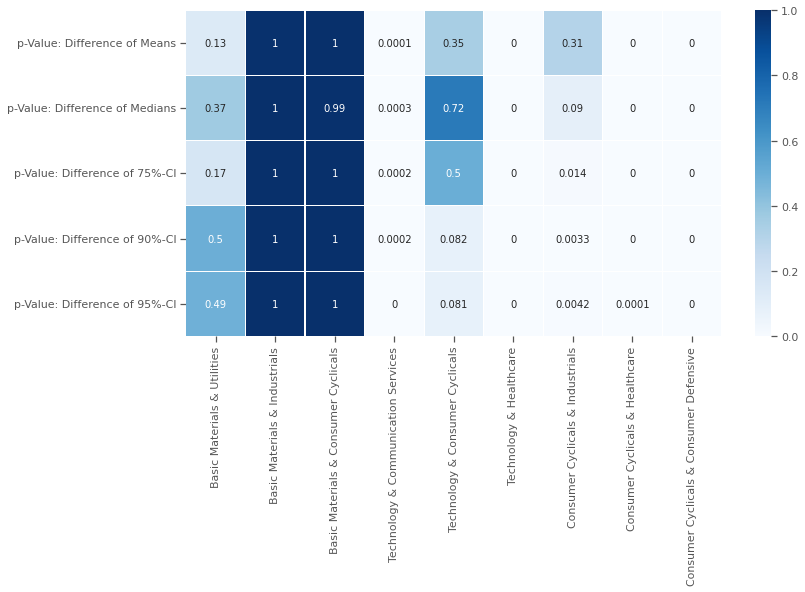

In [ ]:
import seaborn as sns

plt.figure(figsize = (12,6))

p_val_vis = sns.heatmap(pvalues_df, cmap = "Blues", annot = True, linewidths = 0.05)

# Save figure
p_val_vis.figure.savefig("/content/drive/MyDrive/Colab Notebooks/GitHub/00_Repo_Phd-Analysen/(3)_Risikountersuchung_mit_Inferenzstatistik/d2_p-Value_Heatmeap_Sektorenvergleich.pdf")

## b) Permutation-Tests on Pearson-Korrelation

In [ ]:
# Import der WACC-Daten ########################################################
import pandas as pd
dax_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Promotion_Python/05_Risk_and_Uncertainty_Quantification/DAX_Screening_2020_0705.csv", sep = ";", decimal=",", error_bad_lines = False)

dax_df.head()

,Unternehmen,Sektor,Industrie,Jahr,WACC_cMR,WACC_15yMR,WACC_10yMR,WACC_GB_nSt,WACC_GB_vSt,Eigenkapitalquote_MKT,Fremdkapitalquote_MKT,CAPM_cMR,CAPM_15yMR,CAPM_10yMR,Beta,risikoloser Zins,Spalte12,Spalte5,Spalte6,Spalte7,Spalte8,Spalte3,Spalte4,Spalte2,Spalte1,Jahr2,WACC_calc_constDAI,WACC_calc_15YDAI,WACC_calc_10YDAI,WACC_calc_constMRP,WACC_GB_nSt.,WACC_GB_vSt2,Bilanzsumme_BW,Eigenkapital_BW,Fremdkapital_BW,EK-Quote_BW,FK-Quote_BW,Gesamtkapital_MKT,Marktkapitalisierung,FK-Kosten_bereinigt,EK-Quote_MKT,FK-Quote_MKT,Aktienanzahl,Aktienkurs,FK-Kosten_unbereinigt,Zinsaufwand,FK_zinstragend,EK-Kosten_MRP_konstant,EK-Kosten_10J_DAI,Beta2,Steuersaetze,Marktrendite_Mittel,Marktrendite_1Y,Marktrendite_10Y_DAI,Zinssatz_risikofrei,Investitionsquote,Umsatzerloese
0,Adidas AG,Consumer Cyclical,Footwear & Accessories,2004,0.0513,0.0472,0.0443,0.070,NaN,0.326,0.674,0.0711,0.0585,0.04950,0.50,0.0410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004.0,0.046478,0.046151,0.045662,0.050849,0.070,NaN,4427.0,1628.0,2799.0,0.367743,0.632257,4154.3485,1355.3485,0.067074,0.326248,0.673752,45.65,29.69,0.025473,71.3,1063.0,0.072750,0.076500,0.50,0.378,0.1048,0.073,0.073,0.0407,0.000887,5860.0
1,Adidas AG,Consumer Cyclical,Footwear & Accessories,2005,0.0530,0.0448,0.0475,0.081,NaN,0.381,0.619,0.0716,0.0500,0.05717,0.51,0.0407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,0.044717,0.041026,0.047243,0.049924,0.081,NaN,5722.0,2684.0,3038.0,0.469067,0.530933,4907.6000,1869.6000,0.062606,0.380960,0.619040,46.74,40.00,0.024358,74.0,1182.0,0.070010,0.084086,0.51,0.337,0.1048,0.271,0.091,0.0338,-0.056687,6636.0
2,Adidas AG,Consumer Cyclical,Footwear & Accessories,2006,0.0618,0.0594,0.0584,0.075,NaN,0.581,0.419,0.0729,0.0687,0.06698,0.58,0.0338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,0.052556,0.057944,0.055250,0.061581,0.075,NaN,8372.0,2828.0,5544.0,0.337793,0.662207,13217.9047,7673.9047,0.067847,0.580569,0.419431,203.39,37.73,0.033189,184.0,2712.0,0.076660,0.089072,0.58,0.314,0.1048,0.220,0.086,0.0378,2.744601,10084.0
3,Adidas AG,Consumer Cyclical,Footwear & Accessories,2007,0.0435,0.0435,0.0432,0.075,NaN,0.664,0.336,0.0397,0.0397,0.03925,0.03,0.0378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.0,0.043897,0.044335,0.043658,0.044430,0.075,NaN,8314.0,3023.0,5291.0,0.363604,0.636396,15727.0234,10436.0234,0.074890,0.663573,0.336427,203.59,51.26,0.032130,170.0,2270.0,0.044175,0.044073,0.03,0.318,0.1048,0.223,0.066,0.0423,-0.065697,10299.0
4,Adidas AG,Consumer Cyclical,Footwear & Accessories,2008,0.0617,0.0651,0.0537,0.083,NaN,0.466,0.534,0.0712,0.0784,0.05391,0.49,0.0423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.0,0.055372,0.064057,0.036630,0.061497,0.083,NaN,9519.0,3386.0,6133.0,0.355710,0.644290,11494.7784,5361.7784,0.075046,0.466453,0.533547,197.56,27.14,0.033100,203.0,2705.0,0.071752,0.041617,0.49,0.288,0.1048,-0.404,-0.004,0.0400,0.093666,10799.0


**Data Preprocessing**

 1. Data cleaning (only required columns)
 2. Create numpy-arrays of Betas of 2004, 2008, 2012, 2016 2020
 3. Create numpy-arrays of WACC-values

In [ ]:
# 1. Data cleaning (only required columns) #####################################
wacc = dax_df[["Unternehmen", "Sektor", "Jahr", "Beta", "WACC_15yMR"]]
wacc.head()

,Unternehmen,Sektor,Jahr,Beta,WACC_15yMR
0,Adidas AG,Consumer Cyclical,2004,0.50,0.0472
1,Adidas AG,Consumer Cyclical,2005,0.51,0.0448
2,Adidas AG,Consumer Cyclical,2006,0.58,0.0594
3,Adidas AG,Consumer Cyclical,2007,0.03,0.0435
4,Adidas AG,Consumer Cyclical,2008,0.49,0.0651


In [ ]:
# 2. Create numpy-arrays of Betas of 2004, 2008, 2012, 2016 2020 ###############
# Subset Dataframes for respective years: 2004, 2008, 2012, 2016, 2020
betas_2004_df = wacc.loc[wacc["Jahr"] == 2004, ["Beta"]]
betas_2008_df = wacc.loc[wacc["Jahr"] == 2008, ["Beta"]]
betas_2012_df = wacc.loc[wacc["Jahr"] == 2012, ["Beta"]]
betas_2016_df = wacc.loc[wacc["Jahr"] == 2016, ["Beta"]]
betas_2020_df = wacc.loc[wacc["Jahr"] == 2020, ["Beta"]]

# Transform the df in ndarray-format
betas_2004 = betas_2004_df["Beta"].to_numpy()
betas_2008 = betas_2008_df["Beta"].to_numpy()
betas_2012 = betas_2012_df["Beta"].to_numpy()
betas_2016 = betas_2016_df["Beta"].to_numpy()
betas_2020 = betas_2020_df["Beta"].to_numpy()

In [ ]:
# Subset Dataframes for respective years: 2004, 2008, 2012, 2016, 2020 #########
waccs_2004 = wacc.loc[wacc["Jahr"] == 2004, ["WACC_15yMR"]]
waccs_2008 = wacc.loc[wacc["Jahr"] == 2008, ["WACC_15yMR"]]
waccs_2012 = wacc.loc[wacc["Jahr"] == 2012, ["WACC_15yMR"]]
waccs_2016 = wacc.loc[wacc["Jahr"] == 2016, ["WACC_15yMR"]]
waccs_2020 = wacc.loc[wacc["Jahr"] == 2020, ["WACC_15yMR"]]

# Transform df into np.array ###################################################
waccs_2004 = waccs_2004["WACC_15yMR"].to_numpy()
waccs_2008 = waccs_2008["WACC_15yMR"].to_numpy()
waccs_2012 = waccs_2012["WACC_15yMR"].to_numpy()
waccs_2016 = waccs_2016["WACC_15yMR"].to_numpy()
waccs_2020 = waccs_2020["WACC_15yMR"].to_numpy()

# Inspect waccs_2020
waccs_2020

array([0.0324, 0.0083, 0.0549, 0.0448, 0.0287, 0.0202, 0.0432, 0.0208,
       0.0098, 0.0083, 0.0431, 0.0329, 0.0277, 0.0477, 0.0342, 0.0384,
       0.0333, 0.0636, 0.0499, 0.0401, 0.0287, 0.0335, 0.0506, 0.0403,
       0.0303, 0.0217, 0.043 , 0.0389, 0.0524, 0.0196])

**Check for missing data**

In [ ]:
# Inspect length of every array ################################################
print(f"2004: \nBeta-values: {len(betas_2004)} / WACC-values: {len(waccs_2004)}")
print(f"2008: \nBeta-values: {len(betas_2008)} / WACC-values: {len(waccs_2008)}")
print(f"2012: \nBeta-values: {len(betas_2012)} / WACC-values: {len(waccs_2012)}")
print(f"2016: \nBeta-values: {len(betas_2016)} / WACC-values: {len(waccs_2016)}")
print(f"2020: \nBeta-values: {len(betas_2020)} / WACC-values: {len(waccs_2020)}")

2004: 
Beta-values: 30 / WACC-values: 30
2008: 
Beta-values: 30 / WACC-values: 30
2012: 
Beta-values: 30 / WACC-values: 30
2016: 
Beta-values: 30 / WACC-values: 30
2020: 
Beta-values: 30 / WACC-values: 30


### Visualising the observed Correlation

**Compute Intercept and Slope**

In [ ]:
# Compute slope and intercept of the three years ###############################
obs_slope_04, obs_intercept_04 = np.polyfit(betas_2004, waccs_2004, 1)
obs_slope_08, obs_intercept_08 = np.polyfit(betas_2008, waccs_2008, 1)
obs_slope_12, obs_intercept_12 = np.polyfit(betas_2012, waccs_2012, 1)
obs_slope_16, obs_intercept_16 = np.polyfit(betas_2016, waccs_2016, 1)
obs_slope_20, obs_intercept_20 = np.polyfit(betas_2020, waccs_2020, 1)

obs_intercept_04

0.03680746686060197

**Compute Regression-KPIs**

In [ ]:
import statsmodels.api as sm

# Regression for year 2004 #####################################################
# Consider intercept: By default, statsmodels fits a line passing through the origin, 
# i.e. it doesn't fit an intercept
betas_2004_X = sm.add_constant(betas_2004)
# Create Linear Regression model
linreg_04_model = sm.OLS(endog = waccs_2004, exog = betas_2004_X)
# Fit the model
linreg_04_res = linreg_04_model.fit()
# Explore the results and Model parameters
print(f"Regression Results 2004:\n {linreg_04_res.summary()}\n\n\n")


# Regression for year 2008 #####################################################
# Consider intercept: By default, statsmodels fits a line passing through the origin, 
# i.e. it doesn't fit an intercept
betas_2008_X = sm.add_constant(betas_2008)
# Create Linear Regression model
linreg_08_model = sm.OLS(endog = waccs_2008, exog = betas_2008_X)
# Fit the model
linreg_08_res = linreg_08_model.fit()
# Explore the results and Model parameters
print(f"Regression Results 2008:\n {linreg_08_res.summary()}\n\n\n")


# Regression for year 2012 #####################################################
# By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept
betas_2012_X = sm.add_constant(betas_2012)
# Create Linear Regression model
linreg_12_model = sm.OLS(endog = waccs_2012, exog = betas_2012_X)
# Fit the model
linreg_12_res = linreg_12_model.fit()
# Explore the results and Model parameters
print(f"Regression Results 2012:\n {linreg_12_res.summary()}\n\n\n")


# Regression for year 2016 #####################################################
# By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept
betas_2016_X = sm.add_constant(betas_2016)
# Create Linear Regression model
linreg_16_model = sm.OLS(endog = waccs_2016, exog = betas_2016_X)
# Fit the model
linreg_16_res = linreg_16_model.fit()
# Explore the results and Model parameters
print(f"Regression Results 2016:\n {linreg_12_res.summary()}\n\n\n")


# Regression for year 2020 #####################################################
# By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept
betas_2020_X = sm.add_constant(betas_2020)
# Create Linear Regression model
linreg_20_model = sm.OLS(endog = waccs_2020, exog = betas_2020_X)
# Fit the model
linreg_20_res = linreg_20_model.fit()
# Explore the results and Model parameters
print(f"Regression Results 2020:\n {linreg_20_res.summary()}\n")

Regression Results 2004:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9322
Date:                Mon, 01 Nov 2021   Prob (F-statistic):              0.343
Time:                        16:10:11   Log-Likelihood:                 82.518
No. Observations:                  30   AIC:                            -161.0
Df Residuals:                      28   BIC:                            -158.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0368     

**Visualising Regression-parameters**

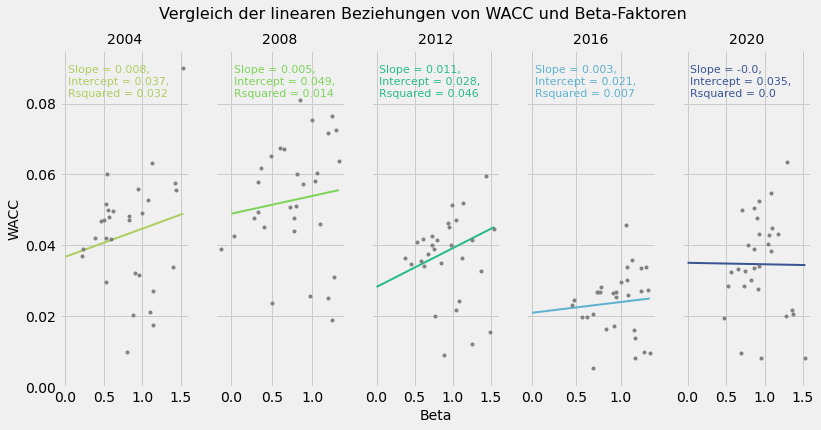

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Setup of the figure #######################################################################
fig, ax = plt.subplots(nrows = 1, ncols = 5, sharey = True, figsize = (12, 6))
plt.subplots_adjust(bottom = 0.1, hspace = 0.3)
plt.style.use("ggplot")

# Compute length of regression lines ########################################################
x_04 = np.array([0,np.max(betas_2004)])
x_08 = np.array([0,np.max(betas_2008)])
x_12 = np.array([0,np.max(betas_2012)])
x_16 = np.array([0,np.max(betas_2016)])
x_20 = np.array([0,np.max(betas_2020)])


# Plot regression lines & observed datapoints ###############################################
ax[0].plot(x_04, obs_slope_04 * x_04 + obs_intercept_04, linewidth = 2.0, color = "#AFCE60")
ax[0].plot(betas_2004, waccs_2004, marker =".", linestyle = "none", color = "gray")

ax[1].plot(x_08, obs_slope_08 * x_08 + obs_intercept_08, linewidth = 2.0, color = "#7CD559")
ax[1].plot(betas_2008, waccs_2008, marker =".", linestyle = "none", color = "gray")

ax[2].plot(x_12, obs_slope_12 * x_12 + obs_intercept_12, linewidth = 2.0, color = "#27BB8A")
ax[2].plot(betas_2012, waccs_2012, marker =".", linestyle = "none", color = "gray")

ax[3].plot(x_16, obs_slope_16 * x_16 + obs_intercept_16, linewidth = 2.0, color = "#5FB2CF")
ax[3].plot(betas_2016, waccs_2016, marker =".", linestyle = "none", color = "gray")

ax[4].plot(x_20, obs_slope_20 * x_20 + obs_intercept_20, linewidth = 2.0, color = "#385492")
ax[4].plot(betas_2020, waccs_2020, marker =".", linestyle = "none", color = "gray")


# Add annotations regarding Regression KPIs #################################################
ax[0].annotate(f"Slope = {round(linreg_04_res.params[1],3)},\nIntercept = {round(linreg_04_res.params[0],3)},\nRsquared = {round(linreg_04_res.rsquared,3)}", 
               xytext = (0.03, 0.082), xy = (0.03, 0.082), color = "#AFCE60", fontsize = 11)

ax[1].annotate(f"Slope = {round(linreg_08_res.params[1],3)},\nIntercept = {round(linreg_08_res.params[0],3)},\nRsquared = {round(linreg_08_res.rsquared,3)}", 
               xytext = (0.03, 0.082), xy = (0.03, 0.082), color = "#7CD559", fontsize = 11)

ax[2].annotate(f"Slope = {round(linreg_12_res.params[1],3)},\nIntercept = {round(linreg_12_res.params[0],3)},\nRsquared = {round(linreg_12_res.rsquared,3)}", 
               xytext = (0.03, 0.082), xy = (0.03, 0.082), color = "#27BB8A", fontsize = 11)

ax[3].annotate(f"Slope = {round(linreg_16_res.params[1],3)},\nIntercept = {round(linreg_16_res.params[0],3)},\nRsquared = {round(linreg_16_res.rsquared,3)}", 
               xytext = (0.03, 0.082), xy = (0.03, 0.082), color = "#5FB2CF", fontsize = 11)

ax[4].annotate(f"Slope = {round(linreg_20_res.params[1],3)},\nIntercept = {round(linreg_20_res.params[0],3)},\nRsquared = {round(linreg_20_res.rsquared,3)}", 
               xytext = (0.03, 0.082), xy = (0.03, 0.082), color = "#385492", fontsize = 11)


# Add Title and Axes labels #################################################################
plt.suptitle("Vergleich der linearen Beziehungen von WACC und Beta-Faktoren", fontsize = 16)

# Suptitles for each Chart
ax[0].set_title("2004", fontsize = 14) 
ax[1].set_title("2008", fontsize = 14)
ax[2].set_title("2012", fontsize = 14)
ax[3].set_title("2016", fontsize = 14)
ax[4].set_title("2020", fontsize = 14)

# Sety-axis limitation
ax[0].set_ylim(0, 0.095) 
ax[1].set_ylim(0, 0.095) 
ax[2].set_ylim(0, 0.095) 
ax[3].set_ylim(0, 0.095) 
ax[4].set_ylim(0, 0.095) 

# Add central located Beta- xlabel
ax[2].set_xlabel("Beta", fontsize = 14)
# Add central located Beta- ylabel
ax[0].set_ylabel("WACC", fontsize = 14)

plt.show()

### Compute Correlation after Permutation-Processing

**Compute empirical Correlation (original values)**

In [ ]:
from scipy.stats import pearsonr
# Pearson Correlation in the year 2004 #########################################
obs_corr_04 = pearsonr(waccs_2004, betas_2004)[0]
print(f"In 2004 Pearson correlation is: {round(obs_corr_04, 3)}\n")

# Pearson Correlation in the year 2008 #########################################
obs_corr_08 = pearsonr(waccs_2008, betas_2008)[0]
print(f"In 2008 Pearson correlation is: {round(obs_corr_08, 3)}\n")

# Pearson Correlation in the year 2012 #########################################
obs_corr_12 = pearsonr(waccs_2012, betas_2012)[0]
print(f"In 2012 Pearson correlation is: {round(obs_corr_12, 3)}\n")

# Pearson Correlation in the year 2016 #########################################
obs_corr_16 = pearsonr(waccs_2016, betas_2016)[0]
print(f"In 2016 Pearson correlation is: {round(obs_corr_16, 3)}\n")

# Pearson Correlation in the year 2020 #########################################
obs_corr_20 = pearsonr(waccs_2020, betas_2020)[0]
print(f"In 2020 Pearson correlation is: {round(obs_corr_20, 3)}")

In 2004 Pearson correlation is: 0.18

In 2008 Pearson correlation is: 0.118

In 2012 Pearson correlation is: 0.214

In 2016 Pearson correlation is: 0.086

In 2020 Pearson correlation is: -0.008


**Compute Correlation of Permutations-Replicates**

In [ ]:
# Permutation on 2004 Data #####################################################
# Initialize permutation replicates: perm_replicates
perm_reps_04 = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute Wacc-Measurements: illiteracy_permuted
    perm_waccs_04 = np.random.permutation(waccs_2004)
    # Compute Pearson correlation
    perm_reps_04[i] = pearsonr(perm_waccs_04, betas_2004)[0]


# Permutation on 2008 Data #####################################################
# Initialize permutation replicates: perm_replicates
perm_reps_08 = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute Wacc-Measurements: illiteracy_permuted
    perm_waccs_08 = np.random.permutation(waccs_2008)
    # Compute Pearson correlation
    perm_reps_08[i] = pearsonr(perm_waccs_08, betas_2008)[0]


# Permutation on 2012 Data #####################################################
# Initialize permutation replicates: perm_replicates
perm_reps_12 = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute Wacc-Measurements: illiteracy_permuted
    perm_waccs_12 = np.random.permutation(waccs_2012)
    # Compute Pearson correlation
    perm_reps_12[i] = pearsonr(perm_waccs_12, betas_2012)[0]


# Permutation on 2016 Data #####################################################
# Initialize permutation replicates: perm_replicates
perm_reps_16 = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute Wacc-Measurements: illiteracy_permuted
    perm_waccs_16 = np.random.permutation(waccs_2016)
    # Compute Pearson correlation
    perm_reps_16[i] = pearsonr(perm_waccs_16, betas_2016)[0]


# Permutation on 2020 Data #####################################################
# Initialize permutation replicates: perm_replicates
perm_reps_20 = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute Wacc-Measurements: illiteracy_permuted
    perm_waccs_20 = np.random.permutation(waccs_2020)
    # Compute Pearson correlation
    perm_reps_20[i] = pearsonr(perm_waccs_20, betas_2020)[0]

### Compute p-Values of Permutations-Correlation

**Compute p-Values**

In [ ]:
# Compute p-value of 2004 ######################################################
p_04 = np.sum(perm_reps_04 >= obs_corr_04) / len(perm_reps_04)
print(f"In 2004 the p-Value is: {p_04}. \nThe hypothesis that values are totally independent from each other is: {p_04 <= 0.05}\n")

# Compute p-value of 2008 ######################################################
p_08 = np.sum(perm_reps_08 >= obs_corr_08) / len(perm_reps_08)
print(f"In 2008 the p-Value is: {p_08}. \nThe hypothesis that values are totally independent from each other is: {p_08 <= 0.05}\n")

# Compute p-value of 2012 ######################################################
p_12 = np.sum(perm_reps_12 >= obs_corr_12) / len(perm_reps_12)
print(f"In 2012 the p-Value is: {p_12}. \nThe hypothesis that values are totally independent from each other is: {p_12 <= 0.05}\n")

# Compute p-value of 2016 ######################################################
p_16 = np.sum(perm_reps_16 >= obs_corr_16) / len(perm_reps_16)
print(f"In 2016 the p-Value is: {p_16}. \nThe hypothesis that values are totally independent from each other is: {p_16 <= 0.05}\n")

# Compute p-value of 2020 ######################################################
p_20 = np.sum(perm_reps_20 >= obs_corr_20) / len(perm_reps_20)
print(f"In 2020 the p-Value is: {p_20}. \nThe hypothesis that values are totally independent from each other is: {p_20 <= 0.05}")

In 2004 the p-Value is: 0.1718. 
The hypothesis that values are totally independent from each other is: False

In 2008 the p-Value is: 0.2662. 
The hypothesis that values are totally independent from each other is: False

In 2012 the p-Value is: 0.1396. 
The hypothesis that values are totally independent from each other is: False

In 2016 the p-Value is: 0.3242. 
The hypothesis that values are totally independent from each other is: False

In 2020 the p-Value is: 0.521. 
The hypothesis that values are totally independent from each other is: False


### Compute p-Values of Test-statistics

**p-Values of Medians**

In [ ]:
# Median in 2004 ###############################################################
perm_median_corr_04 = np.median(perm_reps_04)
print("Median of Pearons correlation in 2004:", round(perm_median_corr_04, 3))

# Median in 2008 ###############################################################
perm_median_corr_08 = np.median(perm_reps_08)
print("Median of Pearons correlation in 2008:", round(perm_median_corr_08, 3))

# Median in 2012 ###############################################################
perm_median_corr_12 = np.median(perm_reps_12)
print("Median of Pearons correlation in 2012:", round(perm_median_corr_12, 3))

# Median in 2016 ###############################################################
perm_median_corr_16 = np.median(perm_reps_16)
print("Median of Pearons correlation in 2016:", round(perm_median_corr_16, 3))

# Median in 2020 ###############################################################
perm_median_corr_20 = np.median(perm_reps_20)
print("Median of Pearons correlation in 2020:", round(perm_median_corr_20, 3))

Median of Pearons correlation in 2004: -0.001
Median of Pearons correlation in 2008: -0.005
Median of Pearons correlation in 2012: -0.003
Median of Pearons correlation in 2016: -0.0
Median of Pearons correlation in 2020: 0.003


**p-Values of 95%-Confidence-intervals**

In [ ]:
# 95%-CI 2004 ###############################################################
LCL95_corr_04 = np.percentile(perm_reps_04, [2.5, 97.5])[0]
UCL95_corr_04 = np.percentile(perm_reps_04, [2.5, 97.5])[1]
print(f"In 2004 the lower limit of 95%-CI is {round(LCL95_corr_04, 3)} and the upper limit is {round(UCL95_corr_04, 3)}\n")

# 95%-CI in 2008 ###############################################################
LCL95_corr_08 = np.percentile(perm_reps_08, [2.5, 97.5])[0]
UCL95_corr_08 = np.percentile(perm_reps_08, [2.5, 97.5])[1]
print(f"In 2008 the lower limit of 95%-CI is {round(LCL95_corr_08, 3)} and the upper limit is {round(UCL95_corr_08, 3)}\n")

# 95%-CI in 2012 ###############################################################
LCL95_corr_12 = np.percentile(perm_reps_12, [2.5, 97.5])[0]
UCL95_corr_12 = np.percentile(perm_reps_12, [2.5, 97.5])[1]
print(f"In 2012 the lower limit of 95%-CI is {round(LCL95_corr_12, 3)} and the upper limit is {round(UCL95_corr_12, 3)}\n")

# 95%-CI in 2016 ###############################################################
LCL95_corr_16 = np.percentile(perm_reps_16, [2.5, 97.5])[0]
UCL95_corr_16 = np.percentile(perm_reps_16, [2.5, 97.5])[1]
print(f"In 2016 the lower limit of 95%-CI is {round(LCL95_corr_16, 3)} and the upper limit is {round(UCL95_corr_16, 3)}\n")

# 95%-CI in 2020 ###############################################################
LCL95_corr_20 = np.percentile(perm_reps_20, [2.5, 97.5])[0]
UCL95_corr_20 = np.percentile(perm_reps_20, [2.5, 97.5])[1]
print(f"In 2020 the lower limit of 95%-CI is {round(LCL95_corr_20, 3)} and the upper limit is {round(UCL95_corr_20, 3)}\n")

In 2004 the lower limit of 95%-CI is -0.361 and the upper limit is 0.356

In 2008 the lower limit of 95%-CI is -0.36 and the upper limit is 0.36

In 2012 the lower limit of 95%-CI is -0.349 and the upper limit is 0.366

In 2016 the lower limit of 95%-CI is -0.361 and the upper limit is 0.363

In 2020 the lower limit of 95%-CI is -0.364 and the upper limit is 0.357



### Visualising the Correlation-distribution

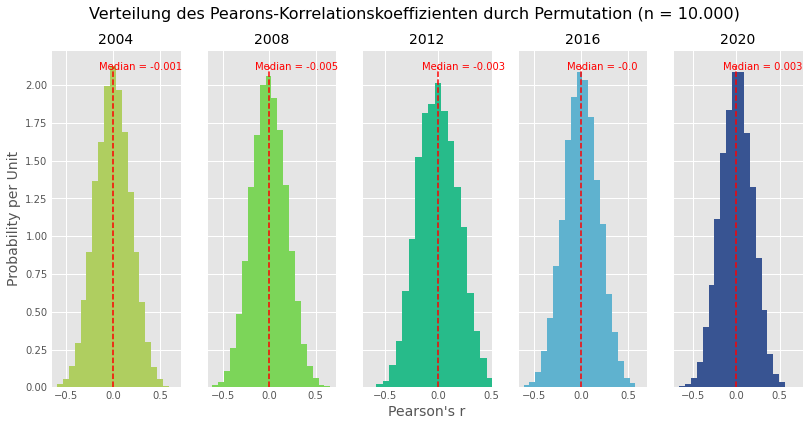

<Figure size 432x288 with 0 Axes>

In [ ]:

fig, ax = plt.subplots(nrows = 1, ncols = 5, sharey = True, figsize = (12, 6))
plt.subplots_adjust(bottom = 0.1, hspace = 0.3)

# Plot PDFs for each year ######################################################
ax[0].hist(perm_reps_04, bins = 20, color = "#AFCE60", density = True)
ax[1].hist(perm_reps_08, bins = 20, color = "#7CD559", density = True)
ax[2].hist(perm_reps_12, bins = 20, color = "#27BB8A", density = True)
ax[3].hist(perm_reps_16, bins = 20, color = "#5FB2CF", density = True)
ax[4].hist(perm_reps_20, bins = 20, color = "#385492", density = True)

ax[2].set_xlim(-0.71, 0.5)

# Add vertical lines ###########################################################
# Median
ax[0].axvline(x = perm_median_corr_04, ymax = 0.95, linestyle = "--", linewidth = 1.5, color = "red")
ax[1].axvline(x = perm_median_corr_08, ymax = 0.95, linestyle = "--", linewidth = 1.5, color = "red")
ax[2].axvline(x = perm_median_corr_12, ymax = 0.95, linestyle = "--", linewidth = 1.5, color = "red")
ax[3].axvline(x = perm_median_corr_16, ymax = 0.95, linestyle = "--", linewidth = 1.5, color = "red")
ax[4].axvline(x = perm_median_corr_20, ymax = 0.95, linestyle = "--", linewidth = 1.5, color = "red")

# Confidence Interval: commented out because of poor readability
#ax[0].axvline(x = LCL95_corr_04, ymax = 0.8, linestyle = "--", linewidth = 1.5, color = "gray")
#ax[0].axvline(x = UCL95_corr_04, ymax = 0.8, linestyle = "--", linewidth = 1.5, color = "gray")
#ax[1].axvline(x = LCL95_corr_14, ymax = 0.8, linestyle = "--", linewidth = 1.5, color = "gray")
#ax[1].axvline(x = UCL95_corr_14, ymax = 0.8, linestyle = "--", linewidth = 1.5, color = "gray")
#ax[2].axvline(x = LCL95_corr_20, ymax = 0.8, linestyle = "--", linewidth = 1.5, color = "gray")
#ax[2].axvline(x = UCL95_corr_20, ymax = 0.8, linestyle = "--", linewidth = 1.5, color = "gray")

# Add Annotations: commented out because of ppor readability
# Lower (LCL) and upper (UCL) 95%-confidence limits #########
#ax[0].annotate("95%-LCL", xytext = (-0.7, 1.6), xy = (-0.7, 1.6), color = "gray", size = 10)
#ax[0].annotate("95%-UCL", xytext = (0.42, 1.6), xy = (0.42, 1.6), color = "gray", size = 10)
#ax[1].annotate("95%-LCL", xytext = (-0.7, 1.6), xy = (-0.7, 1.6), color = "gray", size = 10)
#ax[1].annotate("95%-UCL", xytext = (0.42, 1.6), xy = (0.42, 1.6), color = "gray", size = 10)
#ax[2].annotate("95%-LCL", xytext = (-0.7, 1.6), xy = (-0.7, 1.6), color = "gray", size = 10)
#ax[2].annotate("95%-UCL", xytext = (0.42, 1.6), xy = (0.42, 1.6), color = "gray", size = 10)

ax[0].annotate(f"Median = {round(perm_median_corr_04, 3)}", xytext = (-0.15, 2.1), xy = (-0.15, 2.1), color = "red", size = 10)
ax[1].annotate(f"Median = {round(perm_median_corr_08, 3)}", xytext = (-0.15, 2.1), xy = (-0.15, 2.1), color = "red", size = 10)
ax[2].annotate(f"Median = {round(perm_median_corr_12, 3)}", xytext = (-0.15, 2.1), xy = (-0.15, 2.1), color = "red", size = 10)
ax[3].annotate(f"Median = {round(perm_median_corr_16, 3)}", xytext = (-0.15, 2.1), xy = (-0.15, 2.1), color = "red", size = 10)
ax[4].annotate(f"Median = {round(perm_median_corr_20, 3)}", xytext = (-0.15, 2.1), xy = (-0.15, 2.1), color = "red", size = 10)

# Add Titles and Axes labels ###################################################
plt.suptitle("Verteilung des Pearons-Korrelationskoeffizienten durch Permutation (n = 10.000)", fontsize = 16)
ax[0].set_title("2004", fontsize = 14), ax[1].set_title("2008", fontsize = 14), ax[2].set_title("2012", fontsize = 14), ax[3].set_title("2016", fontsize = 14), ax[4].set_title("2020", fontsize = 14)
ax[2].set_xlabel("Pearson's r", fontsize = 14)
ax[0].set_ylabel("Probability per Unit", fontsize = 14)

plt.show()